In [1]:
%pylab notebook
from PIL import Image
import soundfile as sf
import pygame
from time import sleep

Populating the interactive namespace from numpy and matplotlib


(128, 220)


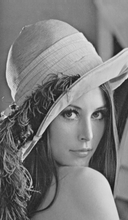

In [2]:
xOffs = 45
img = Image.open("./220px-Lenna_(test_image).png").convert("L")
img = img.crop([xOffs, 0, xOffs+128, img.size[1]])
print(img.size)
imgDat = asarray(img)
img

<IPython.core.display.Javascript object>


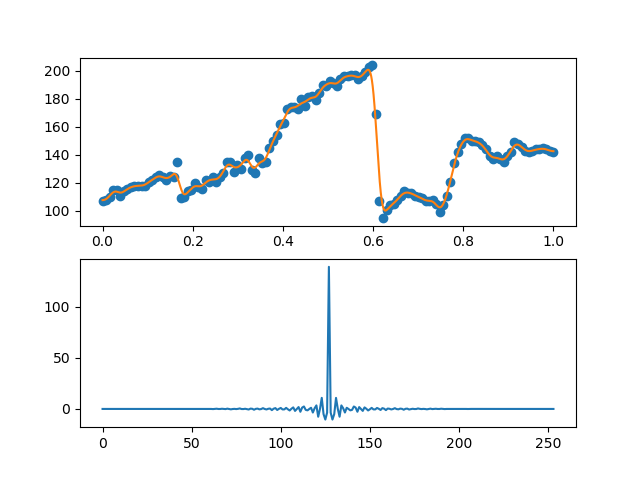

/home/michael/miniconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


In [43]:
close("all")
fig, axs = subplots(2,1)
#h_f = zeros(N)
h_f = imgDat[30, :].astype("float")
# h_f[0] = 1
# h_f[10] = 0.1987
# h_f[42] = 0.42
# h_f[43] = 0.43
# h_f[100] = 0.5
axs[0].plot(linspace(0, 1, h_f.size), h_f, "o")

h_t = fft.irfft(h_f)
h_t = roll(h_t, h_t.size//2)
trunc = 20
# h_t = h_t[127-trunc:127+trunc]
h_t *= blackman(h_t.size)
axs[1].plot(h_t)

h_ff = fft.rfft(h_t, 2**16)
axs[0].plot(linspace(0, 1, h_ff.size), abs(h_ff))